(569, 30)
(569,)
(426, 30)
(143, 30)
Accuracy: 0.95
[[44  6]
 [ 1 92]]
              precision    recall  f1-score   support

   malignant       0.98      0.88      0.93        50
      benign       0.94      0.99      0.96        93

    accuracy                           0.95       143
   macro avg       0.96      0.93      0.94       143
weighted avg       0.95      0.95      0.95       143

Mean accuracy: 0.94
          GaussianNB: mean accuracy=0.94
KNeighborsClassifier: mean accuracy=0.93
  LogisticRegression: mean accuracy=0.95
                 SVC: mean accuracy=0.92


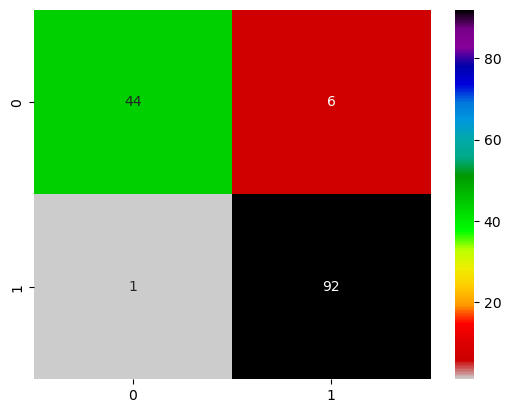

In [12]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
import seaborn as sns
 
breast_cancer = load_breast_cancer()

print(breast_cancer.data.shape)
print(breast_cancer.target.shape)

X_train, X_test, y_train, y_test = train_test_split(
    breast_cancer.data, breast_cancer.target, random_state=11)

print(X_train.shape)
print(X_test.shape)

nb = GaussianNB()

nb.fit(X=X_train, y=y_train)

predicted = nb.predict(X=X_test)
expected = y_test

print(f'Accuracy: {nb.score(X_test, y_test):.2f}')

confusion = confusion_matrix(y_true=expected, y_pred=predicted)
print(confusion)

names = ['malignant', 'benign']
print(classification_report(expected, predicted, target_names=names))

sns.heatmap(confusion, annot=True, cmap='nipy_spectral_r')


kfold = KFold(n_splits=10, random_state=11, shuffle=True)
scores = cross_val_score(estimator=nb, X=breast_cancer.data,
                         y=breast_cancer.target, cv=kfold)
print(f'Mean accuracy: {scores.mean():.2f}')


estimators = {
    'GaussianNB': nb,
    'KNeighborsClassifier': KNeighborsClassifier(),
    'LogisticRegression': LogisticRegression(solver='lbfgs', multi_class='ovr', max_iter=10000),
    'SVC': SVC(gamma='scale')
}

for estimator_name, estimator_object in estimators.items():
    kfold = KFold(n_splits=10, random_state=11, shuffle=True)
    scores = cross_val_score(estimator=estimator_object,
                             X=breast_cancer.data, y=breast_cancer.target,
                             cv=kfold)
    print(f'{estimator_name:>20}: ' + f'mean accuracy={scores.mean():.2f}')
